# Неоднородные СЛАУ
### Случай «Идеальная пара»

<img src='2.3.png'/>

### Случай «В активном поиске»

<img src='2.4.png'/>

Сколько решений имеет система уравнений
<img src='2.4.1.png'/>

In [1]:
import numpy as np

A = np.array([[4, 4, 1], [2, 1, 1]])
Ae = np.array([[4, 4, 1, 7], [2, 1, 1, 2]])
unknow_valiable = 3

rank_A = np.linalg.matrix_rank(A)
rank_Ae = np.linalg.matrix_rank(Ae)

print('rank_A == rank_Ae : ', rank_A == rank_Ae)
print(rank_A, '<', unknow_valiable)
print('Бесконечно много, так как в ней 2 непротиворечивых уравнения на 3 неизвестных верно')

rank_A == rank_Ae :  True
2 < 3
Бесконечно много, так как в ней 2 непротиворечивых уравнения на 3 неизвестных верно


### Случай «Всё сложно»

<img src='2.5.png'/>
<img src='2.6.png'/>


<img src='2.6.1.png'/>

In [2]:
ws = np.array([[1, 1]]).reshape(2, 1)
A = np.array([[1, 5], [2, 1], [1, 1]])
b = np.array([[1, 2, 2]]).reshape(3, 1)


bs = A@ws
e = b - bs
e.reshape(1, 3)

array([[-5, -1,  0]])

<img src = '2.6.3.png'/>

In [3]:
A = np.array([[1, 2], [-3, 1], [1, 2], [1, -1]])
A_gram = A.T@A

b = np.array([[1, 4, 5, 0]]).reshape(4, 1)

A.T@b

ws = np.linalg.inv(A_gram)@(A.T@b)
ws

A_gram

array([[12,  0],
       [ 0, 10]])

## Классическая OLS линейная регрессия

<img src='2.7.png'/>

Можно ли найти классическую OLS оценку в модели целевой переменной y и регрессорами x1, x2, x3
<img src = '2.8.2.png'/>

In [6]:
A = np.array([[1, -1, 0], [1, 1, 2], [0, 0, 0], [2, 0, 2]])

np.linalg.matrix_rank(A)

2

## Стандартизация признаков
<img src = '2.9.png'/>

<img src='2.9.2.png'/>

In [16]:
A = np.array([11, 8])
avg = A.mean()

An = A - np.array([avg, avg])

x_center = (sum(a ** 2 for a in An))**(1/2)

result = (1/x_center) * An

for i in result:
    print(round(i, 2))




0.71
-0.71


## Корреляционная матрица
<img src='2.10.png'/>

## Практика. Классический OLS алгоритм

In [1]:
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


1. GRE Scores ( out of 340 ) — баллы по GRE тестированию
2. TOEFL Scores ( out of 120 ) — баллы по экзамену TOEFL
3. University Rating ( out of 5 ) — рейтинг университета 
4. Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
5. Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
6. Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
7. Research Experience ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

Сколько всего абитуриентов в выборке?

In [6]:
len(data)

500

Составьте корреляциюнную матрицу перечисленных признаков вместе с целевой переменной, исключив столбец Serial No.

In [8]:
data.columns = ['no', 'gre', 'toefl', 'u_rating', 'sop', 'lor', 'cgpa', 'research', 'admit']

In [9]:
data = data.drop('no', axis=1)

In [12]:
corr = data.corr(method='pearson')

,gre,toefl,u_rating,sop,lor,cgpa,research,admit
gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
u_rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


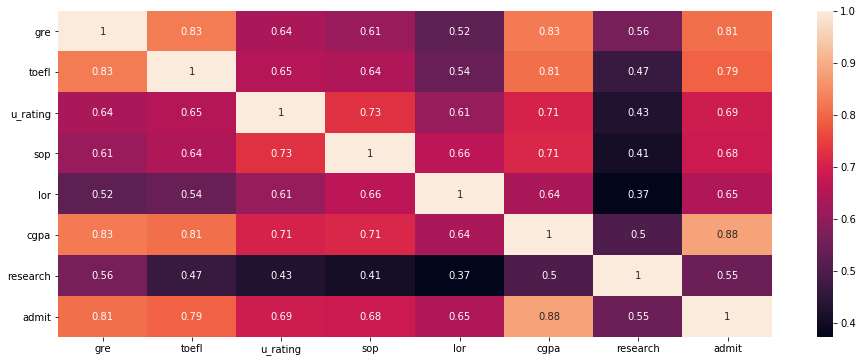

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(data=corr, annot=True)

Постройте отдельно две матрицы корреляций признаков и целевой переменной: для соискателей, делавших исследования (Research=1) и для тех, у кого исследований нет (Research=0).

В каком случае признаки сильнее скоррелированы между собой?

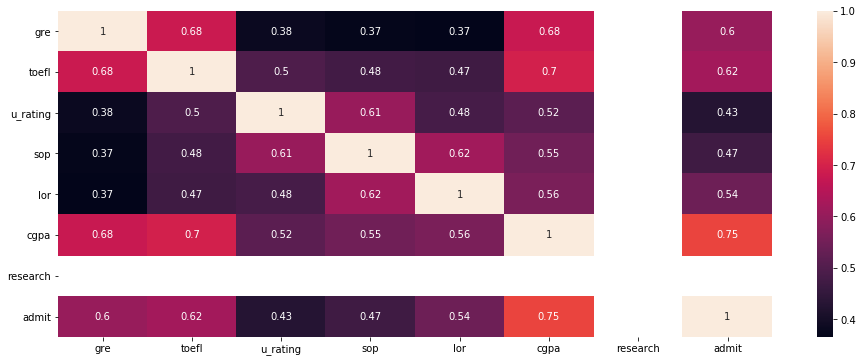

In [17]:
with_research = data[data.research == 0].corr(method='pearson')
plt.figure(figsize=(16,6))
sns.heatmap(data=with_research, annot=True)

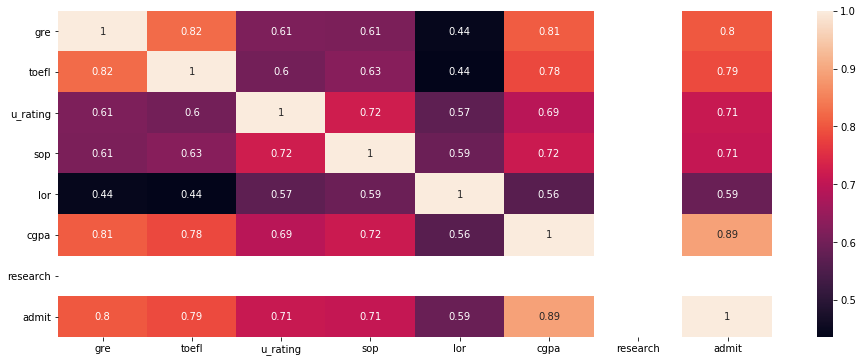

In [19]:
with_out_research = data[data.research == 1].corr(method='pearson')
plt.figure(figsize=(16,6))
sns.heatmap(data=with_out_research, annot=True)

Постройте OLS регрессию Chance of Admission на выбранные в предыдущей задаче признаки без стандартизации. Используйте данные для соискателей, у которых нет исследований (Research == 0). Признаки запишите в матрицу данных в том порядке, в котором они представлены в DataFrame.

In [27]:
with_out_research = data[data.research == 0]
const_len = len(with_out_research)

toefl = with_out_research['toefl']
u_rating = with_out_research['u_rating']
sop = with_out_research['sop']
lor = with_out_research['lor']
cgpa= with_out_research['cgpa']
admit = with_out_research['admit']

A= np.column_stack((np.ones(const_len), toefl, u_rating, sop, lor, cgpa))

np.linalg.lstsq(A,admit,rcond=None)

(array([-9.26420647e-01,  3.97915269e-03, -2.17797822e-03, -3.28631985e-04,
         2.08251959e-02,  1.32319274e-01]),
 array([1.09278293]),
 6,
 array([1.55075287e+03, 1.83591681e+01, 9.77938216e+00, 7.96371743e+00,
        4.74648707e+00, 5.77706379e-01]))

In [ ]:
storedDataMatrix != null && (Strings.isNullOrEmpty(datamatrix) || !datamatrix.equals(storedDataMatrix.getDatamatrixCode()))

In [7]:
False and (False or True)

False